In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.constants import c, h

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})

import convenience_functions as conv

## Construct bandpass of the instrument

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


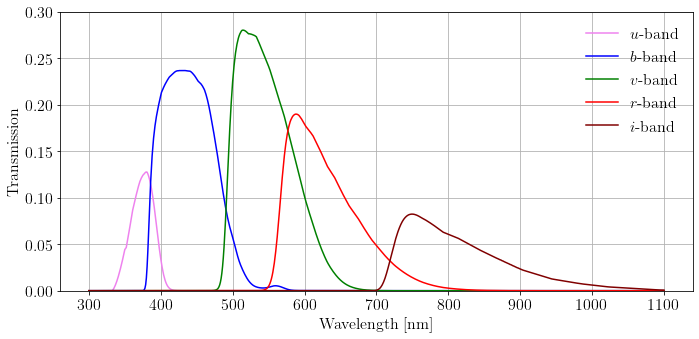

In [2]:
# Telescope
telescope = pd.read_csv("data/instrument/telescope/telescope.csv")
telescope_wave = telescope['wavelength']
telescope_trans = telescope['transmission']

# Camera
camera = pd.read_csv("data/instrument/camera/camera.csv")
camera_wave = camera['wavelength']
camera_trans = camera['transmission']

# Filters
uv = pd.read_csv("data/instrument/filters/u.csv")
u_wave = uv['wavelength']
u_trans = uv['transmission']

b = pd.read_csv("data/instrument/filters/b.csv")
b_wave = b['wavelength']
b_trans = b['transmission']

v = pd.read_csv("data/instrument/filters/v.csv")
v_wave = v['wavelength']
v_trans = v['transmission']

r = pd.read_csv("data/instrument/filters/r.csv")
r_wave = r['wavelength']
r_trans = r['transmission']

i = pd.read_csv("data/instrument/filters/i.csv")
i_wave = i['wavelength']
i_trans = i['transmission']

# Overall bandpasses
u_tot = u_trans * camera_trans * telescope_trans
b_tot = b_trans * camera_trans * telescope_trans
v_tot = v_trans * camera_trans * telescope_trans
r_tot = r_trans * camera_trans * telescope_trans
i_tot = i_trans * camera_trans * telescope_trans

plt.figure(figsize=(10, 5))
plt.plot(u_wave, u_tot, label="$u$-band", color='violet')
plt.plot(b_wave, b_tot, label="$b$-band", color='blue')
plt.plot(v_wave, v_tot, label="$v$-band", color='green')
plt.plot(r_wave, r_tot, label="$r$-band", color='red')
plt.plot(i_wave, i_tot, label="$i$-band", color='maroon')
plt.grid()
plt.ylabel("Transmission")
plt.xlabel("Wavelength [nm]")
plt.legend(frameon=False)
plt.ylim(0, 0.3)

plt.tight_layout()
#plt.savefig("plots/bandpass.eps", format='eps', dpi=500)
plt.show()

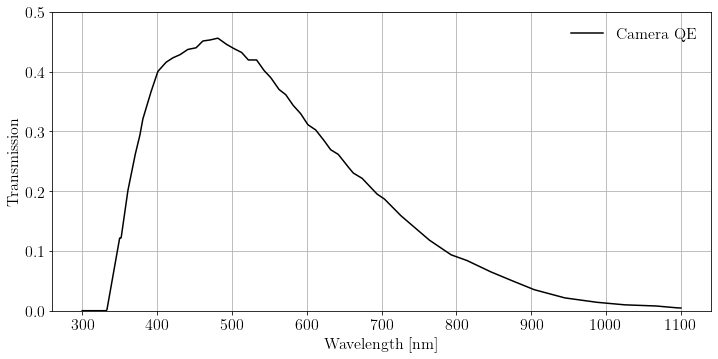

In [3]:
plt.figure(figsize=(10,5))
plt.plot(camera_wave, camera_trans, label="Camera QE", color="k")
plt.grid()
plt.legend(frameon=False)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.ylabel("Transmission")
plt.xlabel("Wavelength [nm]")
#plt.savefig("plots/camera_qe.eps", format='eps', dpi=500)
plt.show()

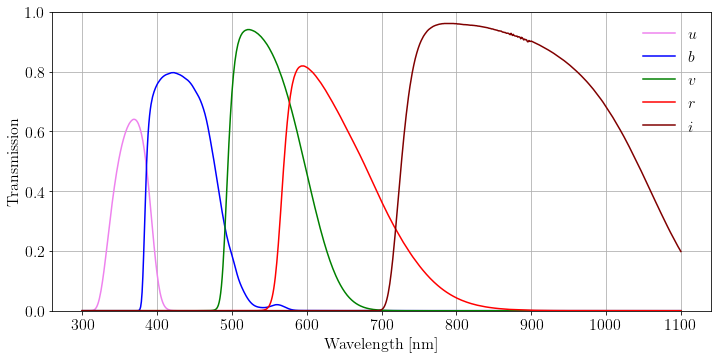

In [4]:
plt.figure(figsize=(10,5))
plt.plot(u_wave, u_trans, label="$u$", color="violet")
plt.plot(b_wave, b_trans, label="$b$", color="blue")
plt.plot(v_wave, v_trans, label="$v$", color="green")
plt.plot(r_wave, r_trans, label="$r$", color="red")
plt.plot(i_wave, i_trans, label="$i$", color="maroon")

plt.grid()
plt.legend(frameon=False)
plt.ylim(0, 1)
plt.tight_layout()
plt.ylabel("Transmission")
plt.xlabel("Wavelength [nm]")
#plt.savefig("plots/filters.eps", format='eps', dpi=500)
plt.show()

# Instrument parameters
- Telescope diameter: 1 meter
- Camera dark current: 0.1 [e/s/pixel]
- Camera read noise: 10 [e/pixel]
- Camera full well capacity: 50000
- Camera digitization resolution: 12 bits
- Camera bias level: 200 ADU

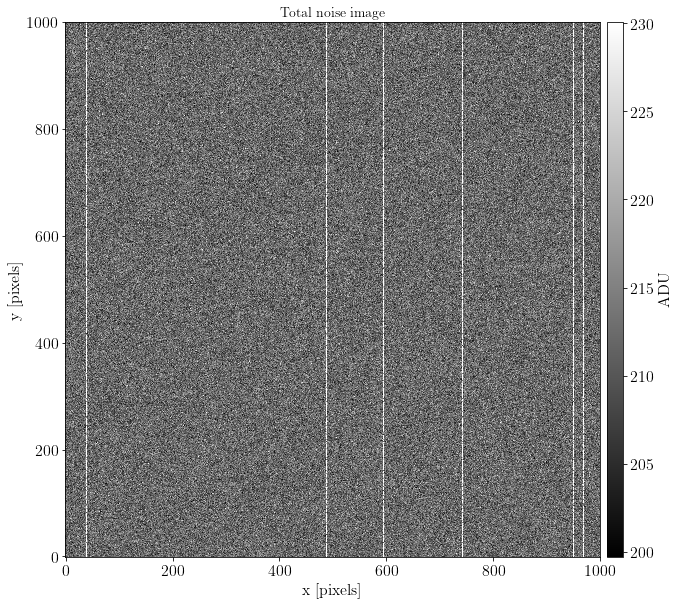

In [22]:
blank_image = np.zeros([1000, 1000])

im_read_noise = conv.get_read_noise(image=blank_image,
                               read_noise_std=10,
                               gain=4.88)
im_dark_current = conv.get_dark_current(image=blank_image,
                           dark_current=0.1,
                           gain=4.88,
                           exposure_time=100,
                           hot_pixels=False)
im_sky_noise = conv.get_sky_bkg(image=blank_image,
                             sky_noise_electrons=0.5,
                             gain=4.88,
                             exposure_time=100)
im_bias = conv.get_bias_level(image=blank_image,
                     bias_value=200,
                     num_columns=6)

noise_combined = im_read_noise+im_dark_current+im_sky_noise+im_bias
conv.plot_image(image=noise_combined,
           title='Total noise image')

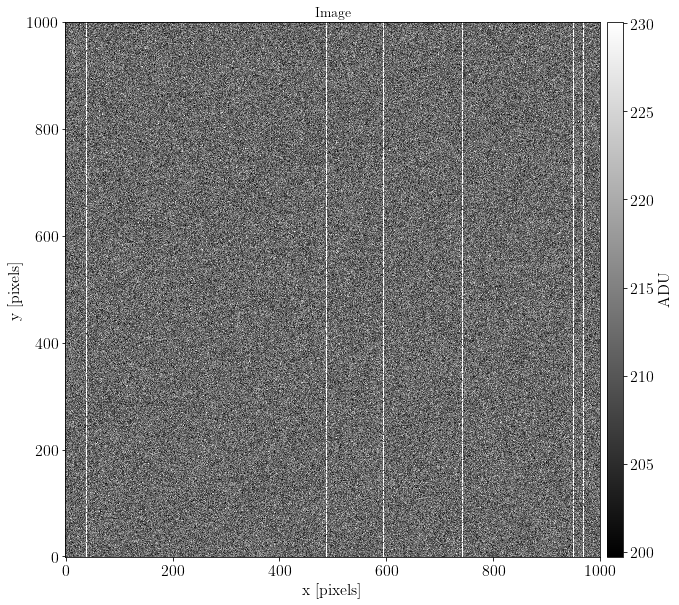

In [23]:
# Add star
from astropy.modeling.models import Gaussian2D

x, y = np.mgrid[0:10, 0:10]
counts = 1000
star = Gaussian2D(amplitude=counts,
                  x_mean=30,
                  y_mean=30)(x, y)
star=0
noise_combined[500:510, 500:510] += star

conv.plot_image(noise_combined)